# Resnet을 이용한 알약 class 분류

## 1. 데이터 불러오기
* 하나의 알약 이미지 zip 파일 업로드
* 코랩에서 압축 풀기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/VS_1/K-039148

for i in range(100):
  !jar xvf /content/VS_1/K-039148.zip

In [ ]:
%cd /content/VS_1/K-039167

for i in range(100):
  !jar xvf /content/VS_1/K-039167.zip

In [ ]:
%cd /content/VS_1/K-039168

for i in range(100):
  !jar xvf /content/VS_1/K-039168.zip

In [ ]:
%cd /content/VS_1/K-039169

for i in range(100):
  !jar xvf /content/VS_1/K-039169.zip

In [ ]:
%cd /content/VS_1/K-039170

for i in range(100):
  !jar xvf /content/VS_1/K-039170.zip

## 데이터 분류
* 원본 이미지 넘버링 -> 비율 확인
* 원본 이미지 출력 -> 크기 확인

In [ ]:
# 원본 이미지 넘버링하기

import os
import glob

path = "/content/VS_1"
K039148 = glob.glob(path+"/K-039148" + '/*')
K039167 = glob.glob(path+"/K-039167"+'/*')
K039168 = glob.glob(path+"/K-039168"+'/*')
K039169 = glob.glob(path+"/K-039169"+'/*')
K039170 = glob.glob(path+"/K-039170"+'/*')

def rename(files):

  if 'K-039148' in files[0]:
     for i,f in enumerate(files):
         os.rename(f, os.path.join(path+"/K-039148", 'K-039148_' + '{0:03d}.png'.format(i)))
     K039148 = glob.glob(path+"/K-039148" + '/*')
     print("K-039148 {}번째 이미지까지 성공".format(i+1))

  elif 'K-039167' in files[0]:
     for i,f in enumerate(files):
         os.rename(f, os.path.join(path+"/K-039167", 'K-039167_' + '{0:03d}.png'.format(i)))
     K039167 = glob.glob(path+"/K-039167"+'/*')
     print("K-039167 {}번째 이미지까지 성공".format(i+1))

  elif 'K-039168' in files[0]:
     for i,f in enumerate(files):
         os.rename(f, os.path.join(path+"/K-039168", 'K-039168_' + '{0:03d}.png'.format(i)))
     K039168 = glob.glob(path+"/K-039168"+'/*')
     print("K-039168 {}번째 이미지까지 성공".format(i+1))

  elif 'K-039169' in files[0]:
     for i,f in enumerate(files):
         os.rename(f, os.path.join(path+"/K-039169", 'K-039169_' + '{0:03d}.png'.format(i)))
     K039169 = glob.glob(path+"/K-039169"+'/*')
     print("K-039169 {}번째 이미지까지 성공".format(i+1))

  elif 'K-039170' in files[0]:
     for i,f in enumerate(files):
         os.rename(f, os.path.join(path+"/K-039170", 'K-039170_' + '{0:03d}.png'.format(i)))
     K039170 = glob.glob(path+"/K-039170"+'/*')
     print("K-039170 {}번째 이미지까지 성공".format(i+1))


In [ ]:
# 이미지 리스트 정렬
K039148 = sorted(glob.glob(path+"/K-039148" + '/*'))
K039167 = sorted(glob.glob(path+"/K-039167"+'/*'))
K039168 = sorted(glob.glob(path+"/K-039168"+'/*'))
K039169 = sorted(glob.glob(path+"/K-039169"+'/*'))
K039170 = sorted(glob.glob(path+"/K-039170"+'/*'))

print('K039148 이미지 개수: {}\nK039167 이미지 개수: {}\nK039168 이미지 개수: {}\nK039169 이미지 개수: {}\nK039170 이미지 개수: {}'.format(len(K039148), len(K039167), len(K039168), len(K039169), len(K039170)))

K039148 이미지 개수: 64
K039167 이미지 개수: 32
K039168 이미지 개수: 38
K039169 이미지 개수: 64
K039170 이미지 개수: 53


In [ ]:
whole_sum = len(K039148) + len(K039167) + len(K039168) + len(K039169) + len(K039170)

print('전체 이미지 개수 : {}\n\n K039148 이미지 비율 : {:.2f}%\n K039167 이미지 비율 : {:.2f}%\n K039168 이미지 비율 : {:.2f}%\n K039169 이미지 비율 : {:.2f}%%\n K039170 이미지 비율 : {:.2f}%'.format( whole_sum, 100*len(K039148)/whole_sum, 100*len(K039167)/whole_sum, 100*len(K039168)/whole_sum, 100*len(K039169)/whole_sum, 100*len(K039170)/whole_sum))

전체 이미지 개수 : 251

 K039148 이미지 비율 : 25.50%
 K039167 이미지 비율 : 12.75%
 K039168 이미지 비율 : 15.14%
 K039169 이미지 비율 : 25.50%%
 K039170 이미지 비율 : 21.12%


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import cv2
%matplotlib inline

In [ ]:
# cv2를 이용해 이미지를 읽는 함수 정의
def read_img(file_path):
    img_arr = cv2.imread(file_path)
    return cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB) # cvtColor로 BGR을 RGB로 바꿔줌

In [ ]:
# 각 이미지 폴더에서 2개씩 랜덤으로 이미지 시각화 하기

# 이미지 array 준비
import random
img_arrs = []
img_num = range(0,32)  # 제일 적은 수의 알약에 맞춤

for i in random.sample(img_num,2):

    img_arrs.append(read_img(K039148[i]))
    img_arrs.append(read_img(K039167[i]))
    img_arrs.append(read_img(K039168[i]))
    img_arrs.append(read_img(K039169[i]))
    img_arrs.append(read_img(K039170[i]))

In [ ]:
print("총 {}개의 이미지 ".format(len(img_arrs)))

총 10개의 이미지 


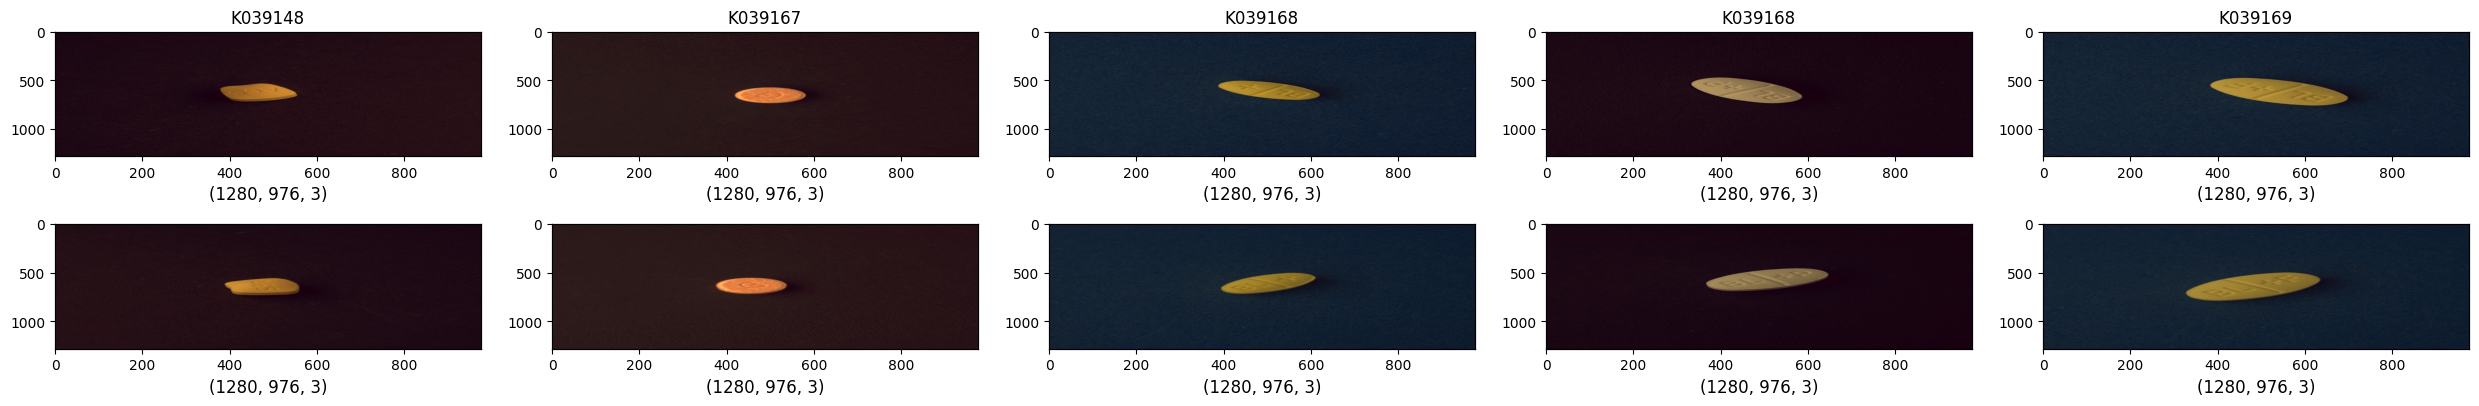

In [ ]:
rows = 2  # 2개씩 샘플링 했으므로
columns = 5

# 그림판 설정
fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*5, rows*2))

# 각 판에 이미지 출력
for num in range(1, rows*columns+1): # 1번 부터 10번 까지

    fig.add_subplot(rows, columns, num) # 원하는 위치 번호(num)를 입력
    idx = num - 1 # 인덱스

    plt.imshow(img_arrs[idx], aspect='auto')
    plt.xlabel(f'{img_arrs[idx].shape}', fontsize=12)

fig.tight_layout() # 이미지 사이 간격 조정



# 제목 설정
cols = ['K039148', 'K039167', 'K039168', 'K039168', 'K039169', 'K039170']

for folder_idx, ax in enumerate(axes[0]):
    ax.set_title(cols[folder_idx])

# xtick, ytick 제거
for idx, ax in enumerate(axes.flat):
    ax.set_xticks([])
    ax.set_yticks([])

이미지 사이즈가 전부 동일함을 확인

## train/test split

In [ ]:
# 비율이 작은 test로 빠르게 split

import math

K039148_test_count = round(len(K039148)*0.2)
K039167_test_count = round(len(K039167)*0.2)
K039168_test_count = round(len(K039168)*0.2)
K039169_test_count = round(len(K039169)*0.2)
K039170_test_count = round(len(K039170)*0.2)

print('K039148_test파일에 들어갈 이미지 개수 : {}/{}'.format(K039148_test_count,len(K039148)))
print('K039167_test파일에 들어갈 이미지 개수 : {}/{}'.format(K039167_test_count,len(K039167)))
print('K039168_test파일에 들어갈 이미지 개수 : {}/{}'.format(K039168_test_count,len(K039168)))
print('K039169_test파일에 들어갈 이미지 개수 : {}/{}'.format(K039169_test_count,len(K039169)))
print('K039170_test파일에 들어갈 이미지 개수 : {}/{}'.format(K039170_test_count,len(K039170)))

K039148_test파일에 들어갈 이미지 개수 : 13/64
K039167_test파일에 들어갈 이미지 개수 : 6/32
K039168_test파일에 들어갈 이미지 개수 : 8/38
K039169_test파일에 들어갈 이미지 개수 : 13/64
K039170_test파일에 들어갈 이미지 개수 : 11/53


In [ ]:
import shutil
def split( img_list, test_count, train_path, test_path):

  test_files=[]
  for i in random.sample( img_list, test_count ):
    test_files.append(i)

  # 차집합으로 train/test 리스트 생성하기
  train_files = [x for x in img_list if x not in test_files]

  for k in train_files:
    shutil.copy(k, train_path)

  for c in test_files:
    shutil.copy(c, test_path)

  print('train 폴더 이미지 개수 : {}\ntest 폴더 이미지 개수 : {}'.format(len(glob.glob(train_path+'/*')),len(glob.glob(test_path+'/*'))))

In [ ]:
# 파일 split
K039148_train_path='/content/VS_1/train/K-039148'
K039148_test_path='/content/VS_1/test/K-039148'

K039167_train_path='/content/VS_1/train/K-039167'
K039167_test_path='/content/VS_1/test/K-039167'

K039168_train_path='/content/VS_1/train/K-039168'
K039168_test_path='/content/VS_1/test/K-039168'

K039169_train_path='/content/VS_1/train/K-039169'
K039169_test_path='/content/VS_1/test/K-039169'

K039170_train_path='/content/VS_1/train/K-039170'
K039170_test_path='/content/VS_1/test/K-039170'

split(K039148, K039148_test_count, K039148_train_path, K039148_test_path)
split(K039167, K039167_test_count, K039167_train_path, K039167_test_path)
split(K039168, K039168_test_count, K039168_train_path, K039168_test_path)
split(K039169, K039169_test_count, K039169_train_path, K039169_test_path)
split(K039170, K039170_test_count, K039170_train_path, K039170_test_path)

train 폴더 이미지 개수 : 51
test 폴더 이미지 개수 : 14
train 폴더 이미지 개수 : 26
test 폴더 이미지 개수 : 6
train 폴더 이미지 개수 : 30
test 폴더 이미지 개수 : 8
train 폴더 이미지 개수 : 51
test 폴더 이미지 개수 : 13
train 폴더 이미지 개수 : 42
test 폴더 이미지 개수 : 11


In [ ]:
# 원본 이미지 넘버링하기 -> rename 함수를 만들어줬으므로 경로만 바꿔서 재사용

# trainset 넘버링

path = "/content/drive/MyDrive/졸프/data/VS_1/train"
K039148 = glob.glob(path+"/K-039148" + '/*')
K039167 = glob.glob(path+"/K-039167" + '/*')
K039168 = glob.glob(path+"/K-039168" + '/*')
K039169 = glob.glob(path+"/K-039169" + '/*')
K039170 = glob.glob(path+"/K-039170" + '/*')

rename(K039148)
rename(K039167)
rename(K039168)
rename(K039169)
rename(K039170)

K-039148 51번째 이미지까지 성공
K-039167 26번째 이미지까지 성공
K-039168 30번째 이미지까지 성공
K-039169 51번째 이미지까지 성공
K-039170 42번째 이미지까지 성공


In [ ]:
# testset 넘버링

path = "/content/drive/MyDrive/졸프/data/VS_1/test"
K039148 = glob.glob(path+"/K-039148" + '/*')
K039167 = glob.glob(path+"/K-039167" + '/*')
K039168 = glob.glob(path+"/K-039168" + '/*')
K039169 = glob.glob(path+"/K-039169" + '/*')
K039170 = glob.glob(path+"/K-039170" + '/*')

rename(K039148)
rename(K039167)
rename(K039168)
rename(K039169)
rename(K039170)

K-039148 13번째 이미지까지 성공
K-039167 6번째 이미지까지 성공
K-039168 8번째 이미지까지 성공
K-039169 13번째 이미지까지 성공
K-039170 11번째 이미지까지 성공


## 이미지 전처리

In [ ]:
import torch
import torchvision
from torchvision import transforms # 이미지 데이터 transform
from torch.utils.data import DataLoader # 이미지 데이터 로더
import os
import glob

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [ ]:
# 경로 지정

train_path = '/content/drive/MyDrive/졸프/data/VS_1/train'
test_path = '/content/drive/MyDrive/졸프/data/VS_1/test'

K039148_dir = '/K-039148/'
K039167_dir = '/K-039167/'
K039168_dir = '/K-039168/'
K039169_dir = '/K-039169/'
K039170_dir = '/K-039170/'

방법1) 파이토치 라이브러리 / 방법2) albumentation 중 방법1 사용

1. 이미지 resize
2. resize한 이미지 스케일링
3. 전처리한 이미지 augmentation -> 변형이 너무 커서 X
4. data loader로 학습 준비



In [ ]:
# 1) 파이토치 라이브러리
# 이미지 resize & 스케일링
resize_trans = transforms.Compose([
                                   transforms.Resize((128,128)),
                                   transforms.ToTensor()
])

resize_train = torchvision.datasets.ImageFolder(root=train_path, transform=resize_trans)
resize_test = torchvision.datasets.ImageFolder(root=test_path, transform=resize_trans)

In [ ]:
resize_train[0][0].shape # ToTensor를 진행했기 때문에 데이터가 torch(C,H,W) 형태로 바뀜

torch.Size([3, 128, 128])

In [ ]:
resize_train[0][0]

tensor([[[0.1451, 0.1412, 0.1373,  ..., 0.1137, 0.1059, 0.1059],
         [0.1412, 0.1451, 0.1412,  ..., 0.1098, 0.1059, 0.1098],
         [0.1412, 0.1451, 0.1373,  ..., 0.1098, 0.1098, 0.1098],
         ...,
         [0.1294, 0.1333, 0.1412,  ..., 0.1020, 0.0980, 0.1020],
         [0.1490, 0.1412, 0.1412,  ..., 0.1020, 0.1020, 0.1020],
         [0.1412, 0.1373, 0.1412,  ..., 0.1059, 0.1059, 0.1059]],

        [[0.0627, 0.0588, 0.0588,  ..., 0.0392, 0.0353, 0.0314],
         [0.0627, 0.0588, 0.0588,  ..., 0.0353, 0.0353, 0.0353],
         [0.0588, 0.0588, 0.0549,  ..., 0.0353, 0.0353, 0.0353],
         ...,
         [0.0588, 0.0549, 0.0588,  ..., 0.0275, 0.0275, 0.0275],
         [0.0627, 0.0588, 0.0588,  ..., 0.0275, 0.0275, 0.0275],
         [0.0588, 0.0588, 0.0588,  ..., 0.0353, 0.0314, 0.0314]],

        [[0.0863, 0.0863, 0.0863,  ..., 0.0824, 0.0784, 0.0784],
         [0.0863, 0.0863, 0.0863,  ..., 0.0824, 0.0784, 0.0784],
         [0.0863, 0.0863, 0.0863,  ..., 0.0784, 0.0784, 0.

In [ ]:
import numpy as np
np.mean(resize_train[0][0].numpy(),axis=(1,2)) # numpy로 바꾸고, axis = 1,2 mean으로 RGB mean/std 뽑기

array([0.14108816, 0.0610038 , 0.08549184], dtype=float32)

In [ ]:
def get_mean_std(dataset):
  meanRGB = [np.mean(image.numpy(), axis=(1,2)) for image,_ in dataset]
  stdRGB = [np.std(image.numpy(), axis=(1,2)) for image,_ in dataset]

  meanR = np.mean([m[0] for m in meanRGB])
  meanG = np.mean([m[1] for m in meanRGB])
  meanB = np.mean([m[2] for m in meanRGB])

  stdR = np.mean([s[0] for s in stdRGB])
  stdG = np.mean([s[1] for s in stdRGB])
  stdB = np.mean([s[2] for s in stdRGB])

  print(meanR, meanG, meanB)
  print(stdR, stdG, stdB)

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
get_mean_std(resize_train)

0.122162834 0.08992433 0.13514708
0.08684908 0.06752275 0.023839433


In [ ]:
get_mean_std(resize_test)

0.120260105 0.09096088 0.13980968
0.08612696 0.067686275 0.023293456


In [ ]:
# normalization 준비

resize_train_mean=[0.17191947, 0.41128376, 0.56153077]
resize_train_std=[0.16150557, 0.16577946, 0.16063999]

resize_test_mean=[0.120260105, 0.09096088, 0.13980968]
resize_test_std=[0.08612696, 0.067686275, 0.023293456]

In [ ]:
# transform을 이용해 data augmentation하기 -> 변형이 커서 augmentation XXX
#transform_train = transforms.Compose([
#    transforms.Resize((128, 128)), # 이미지 resize
#    transforms.RandomCrop(124), # 이미지를 랜덤으로 크롭
#    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2), # 이미지 지터링(밝기, 대조, 채비, 색조)
#    transforms.RandomHorizontalFlip(p = 1), # p확률로 이미지 좌우반전
#    transforms.RandomVerticalFlip(p = 1), # p확률로 상하반전
#    transforms.ToTensor(),
#    transforms.Normalize(resize_train_mean, resize_train_std)
#])

#transform_test = transforms.Compose([
#    transforms.Resize((128, 128)),
#    transforms.ToTensor(),
#    transforms.Normalize(resize_test_mean, resize_test_std)
#])

#trainset = torchvision.datasets.ImageFolder(root=train_path, transform=transform_train)
#testset = torchvision.datasets.ImageFolder(root=test_path, transform=transform_test)

#train_loader = torch.utils.data.DataLoader(trainset, batch_size=1,
#                                          shuffle=True, num_workers=0)

#test_loader = torch.utils.data.DataLoader(testset, batch_size=1,
#                                         shuffle=False, num_workers=0)


In [ ]:
#dataiter = iter(train_loader)
#images, labels = next(dataiter)
#images.shape

torch.Size([1, 3, 124, 124])

In [ ]:
# augmentation을 적용한 알약 이미지 확인하기

#import matplotlib.pyplot as plt
#import numpy as np

#%matplotlib inline

#def imshow(img, mean, std):
#    npimg = img.numpy()
#    img = np.transpose( npimg, (1, 2, 0) )
#    img = img * std + mean # renormalize
#    img = img.clip(0, 1)
#    plt.imshow(img)
#    plt.show()


#none_trans = torchvision.datasets.ImageFolder(root=train_path, transform=None)

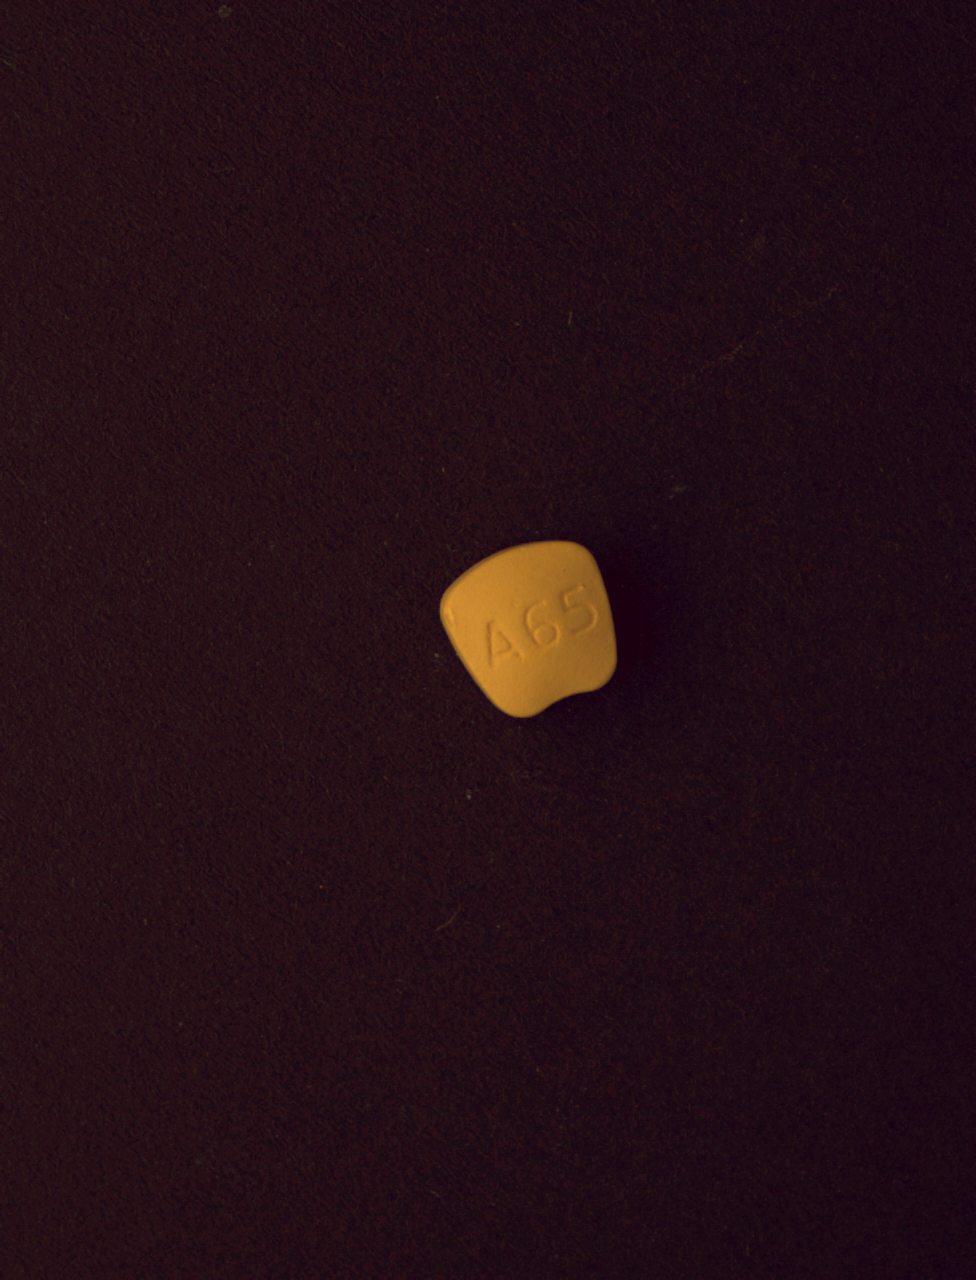

In [ ]:
# 원본 이미지
#none_trans[30][0]

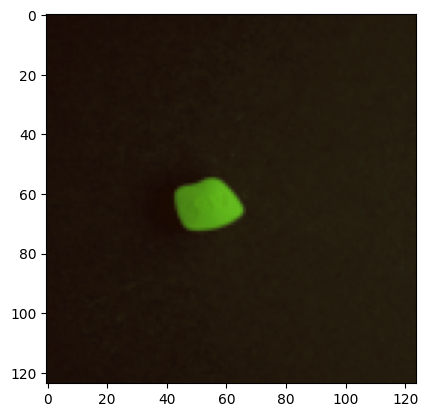

In [ ]:
# augmentation을 적용한 이미지
#imshow((trainset[30][0]),resize_train_mean,resize_train_std)

In [ ]:
# Data preparation
# 이미지 크기 변환 후 텐서로 변환하는 전처리
transf = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(resize_train_mean, resize_train_std),
])

trainset = torchvision.datasets.ImageFolder(root=train_path, transform=transf)
testset = torchvision.datasets.ImageFolder(root=test_path, transform=transf)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=1,
                                          shuffle=True, num_workers=0)

testloader = torch.utils.data.DataLoader(testset, batch_size=1,
                                         shuffle=False, num_workers=0)

## Resnet fine-tuning
* 기존 weight들은 그대로 사용하고, 마지막 fc layer만 튜닝해서 최소한의 학습을 통해 모델링

In [ ]:
# pytorch
import torch
import torchvision
from torchvision import transforms, datasets, models
from torchsummary import summary

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import copy
import time

In [ ]:
classes = ('K-039148', 'K-039167', 'K-039168', 'K-039169', 'K-039170')

In [ ]:
resnet_pt = models.resnet18(pretrained=True)
# freezing
for param in resnet_pt.parameters():
    param.requires_grad = False

# fc layer 수정
fc_in_features = resnet_pt.fc.in_features
resnet_pt.fc = nn.Linear(fc_in_features, len(classes))
resnet_pt = resnet_pt.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
summary(resnet_pt, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 16, 16]           9,408
       BatchNorm2d-2           [-1, 64, 16, 16]             128
              ReLU-3           [-1, 64, 16, 16]               0
         MaxPool2d-4             [-1, 64, 8, 8]               0
            Conv2d-5             [-1, 64, 8, 8]          36,864
       BatchNorm2d-6             [-1, 64, 8, 8]             128
              ReLU-7             [-1, 64, 8, 8]               0
            Conv2d-8             [-1, 64, 8, 8]          36,864
       BatchNorm2d-9             [-1, 64, 8, 8]             128
             ReLU-10             [-1, 64, 8, 8]               0
       BasicBlock-11             [-1, 64, 8, 8]               0
           Conv2d-12             [-1, 64, 8, 8]          36,864
      BatchNorm2d-13             [-1, 64, 8, 8]             128
             ReLU-14             [-1, 6

In [ ]:
# loss, optimizer, lr scheduler를 정의

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet_pt.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)

In [ ]:
# Train과 Test를 위한 function 정의
def train(epoch, model, criterion, optimizer):
    model.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, labels) in enumerate(trainloader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()*inputs.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    epoch_loss = train_loss/total
    epoch_acc = correct/total*100
    print("Train | Loss:%.4f Acc: %.2f%% (%s/%s)"
        % (epoch_loss, epoch_acc, correct, total))
    return epoch_loss, epoch_acc

def test(epoch, model, criterion, optimizer):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (inputs, labels) in enumerate(testloader):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item()*inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        epoch_loss = test_loss/total
        epoch_acc = correct/total*100
        print("Test | Loss:%.4f Acc: %.2f%% (%s/%s)"
            % (epoch_loss, epoch_acc, correct, total))
    return epoch_loss, epoch_acc

In [ ]:
# learning

start_time = time.time()
best_acc = 0
epoch_length = 10
save_loss = {"train":[],
             "test":[]}
save_acc = {"train":[],
             "test":[]}
for epoch in range(epoch_length):
    print("Epoch %s" % epoch)
    train_loss, train_acc = train(epoch, resnet_pt, criterion, optimizer)
    save_loss['train'].append(train_loss)
    save_acc['train'].append(train_acc)

    test_loss, test_acc = test(epoch, resnet_pt, criterion, optimizer)
    save_loss['test'].append(test_loss)
    save_acc['test'].append(test_acc)

    scheduler.step()

    # Save model
    if test_acc > best_acc:
        best_acc = test_acc
        best_model_wts = copy.deepcopy(resnet_pt.state_dict())
    resnet_pt.load_state_dict(best_model_wts)

learning_time = time.time() - start_time
print(f'**Learning time: {learning_time // 60:.0f}m {learning_time % 60:.0f}s')